C:\Users\23798\AppData\Local\Temp\ipykernel_2844\179366188.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv')


LU
CD         71988
R1         30441
R2         16814
R3         13468
CM         10768
CP          8451
E           7610
RL - RL     6030
C           4658
A           2964
RC          2935
R4          2496
CC          1555
CL          1386
I            438
EA           237
AH             3
Name: count, dtype: int64


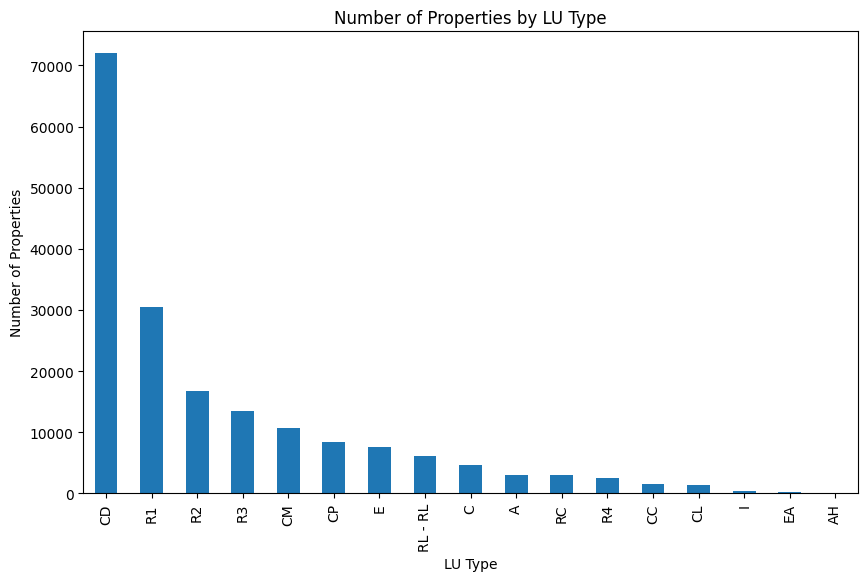

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv')

lu_counts = data['LU'].value_counts()

# Print out the LU types and their counts
print(lu_counts)

# Plot the data
lu_counts.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Number of Properties by LU Type')
plt.xlabel('LU Type')
plt.ylabel('Number of Properties')

# Show the plot
plt.show()

C:\Users\23798\AppData\Local\Temp\ipykernel_2844\1521260372.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv')


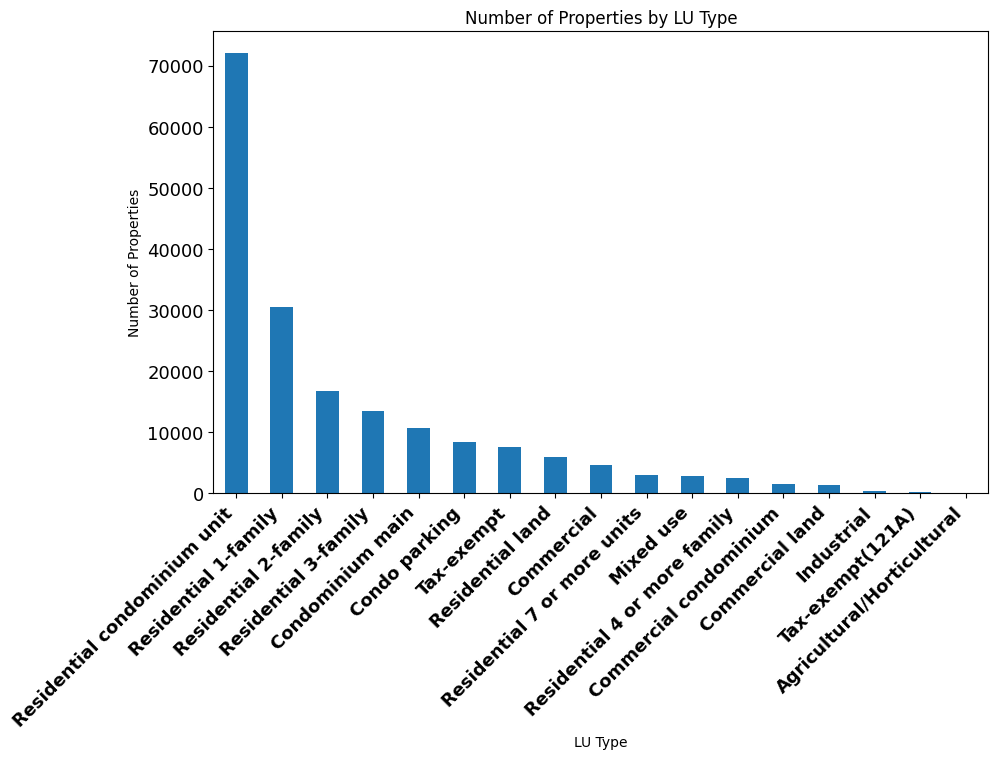

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv')

# Count of each LU type
lu_counts = data['LU'].value_counts()

# Your provided LU descriptions mapping
lu_descriptions = {
    'A': 'Residential 7 or more units',
    'E': 'Tax-exempt',
    'AH': 'Agricultural/Horticultural',
    'EA': 'Tax-exempt(121A)',
    'C': 'Commercial',
    'I': 'Industrial',
    'CC': 'Commercial condominium',
    'R1': 'Residential 1‐family',
    'CD': 'Residential condominium unit',
    'R2': 'Residential 2‐family',
    'CL': 'Commercial land',
    'R3': 'Residential 3‐family',
    'CM': 'Condominium main',
    'R4': 'Residential 4 or more family',
    'RC': 'Mixed use',
    'CP': 'Condo parking',
    'RL - RL': 'Residential land'
}

# Replace LU abbreviations with full names in lu_counts index
lu_counts.index = lu_counts.index.map(lambda x: lu_descriptions.get(x, x))

# Plotting
lu_counts.plot(kind='bar', figsize=(10, 6), fontsize=13)

# Setting title and labels with full LU names
plt.title('Number of Properties by LU Type')
plt.xlabel('LU Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha="right", fontweight='bold', fontsize=13)  # Rotate x-axis labels for better readability

plt.show()


PROP_VIEW
A - Average      110895
G - Good          13086
F - Fair           6033
E - Excellent      4405
P - Poor            525
S - Special         345
Name: count, dtype: int64


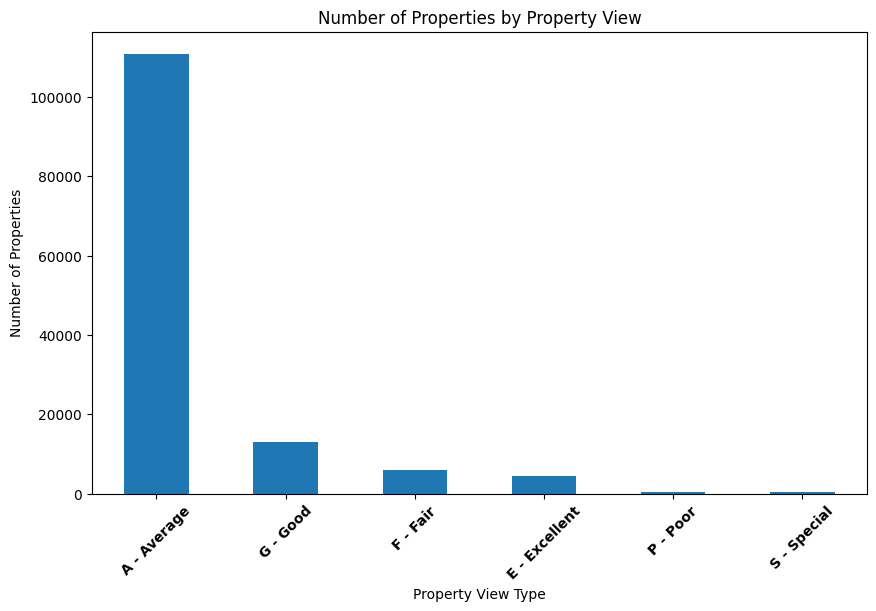

In [15]:
# Get the Property View counts
prop_view_counts = data['PROP_VIEW'].value_counts()

# Print out the Property View types and their counts
print(prop_view_counts)

# Plot the data
prop_view_counts.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Number of Properties by Property View')
plt.xlabel('Property View Type')
plt.ylabel('Number of Properties')
# bold x-axis labels
plt.xticks(fontweight='bold', rotation=45)

# Show the plot
plt.show()

In [5]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np

# Load your data
data_path = 'PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv'  # Change this to the path of your CSV file
data = pd.read_csv(data_path, low_memory=False)

# Generate a color for each PROP_VIEW category
prop_view_unique = data['PROP_VIEW'].dropna().unique()
np.random.seed(42)  # For reproducibility
prop_view_colors = {view: '#' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=6)) for view in prop_view_unique}

# Create map object
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Load the GeoJSON for the neighborhood boundaries
geojson_path = 'BPDA_Neighborhood_Boundaries.geojson'  # Change this to the path of your GeoJSON file
folium.GeoJson(geojson_path, name='Boston Neighborhoods').add_to(boston_map)

# Create a MarkerCluster object for each PROP_VIEW category with the proper description
prop_view_clusters = {view: MarkerCluster(name=view).add_to(boston_map) for view in prop_view_unique}

# Keep track of PROP_VIEW values for each address to prevent duplicates
address_viewed = {}

# Add markers to the respective cluster with PROP_VIEW description as the name, with the color
for idx, row in data.iterrows():
    address = row['full_addr']
    view = row['PROP_VIEW']
    coord = (row['Latitude'], row['Longitude'])
    
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']) and pd.notnull(view):
        # If address is not in the dictionary, or the PROP_VIEW for this address hasn't been added yet
        if address not in address_viewed or view not in address_viewed[address]:
            # Add the PROP_VIEW to the set for this address
            address_viewed.setdefault(address, set()).add(view)
            
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=5,
                color=prop_view_colors[view],
                fill=True,
                fill_color=prop_view_colors[view],
                fill_opacity=0.7,
                popup=f'{view}: {address}'
            ).add_to(prop_view_clusters[view])

# Add layer control to toggle on/off different PROP_VIEW categories
folium.LayerControl().add_to(boston_map)

# Save map
boston_map.save('boston_prop_view_map.html')


INT_COND
A - Average      63032
G - Good         54911
E - Excellent    14267
F - Fair          1198
P - Poor            88
Name: count, dtype: int64
EXT_COND
A - Average      78882
G - Good         55519
E - Excellent     9407
F - Fair          2215
P - Poor            61
Name: count, dtype: int64
OVERALL_COND
A - Average                130657
G - Good                    36490
E - Excellent                1728
VG - Very Good               1380
EX - Excellent               1252
F - Fair                     1019
P - Poor                       98
US - Unsound                   18
VP - Very Poor                 12
AVG - Default - Average         1
Name: count, dtype: int64


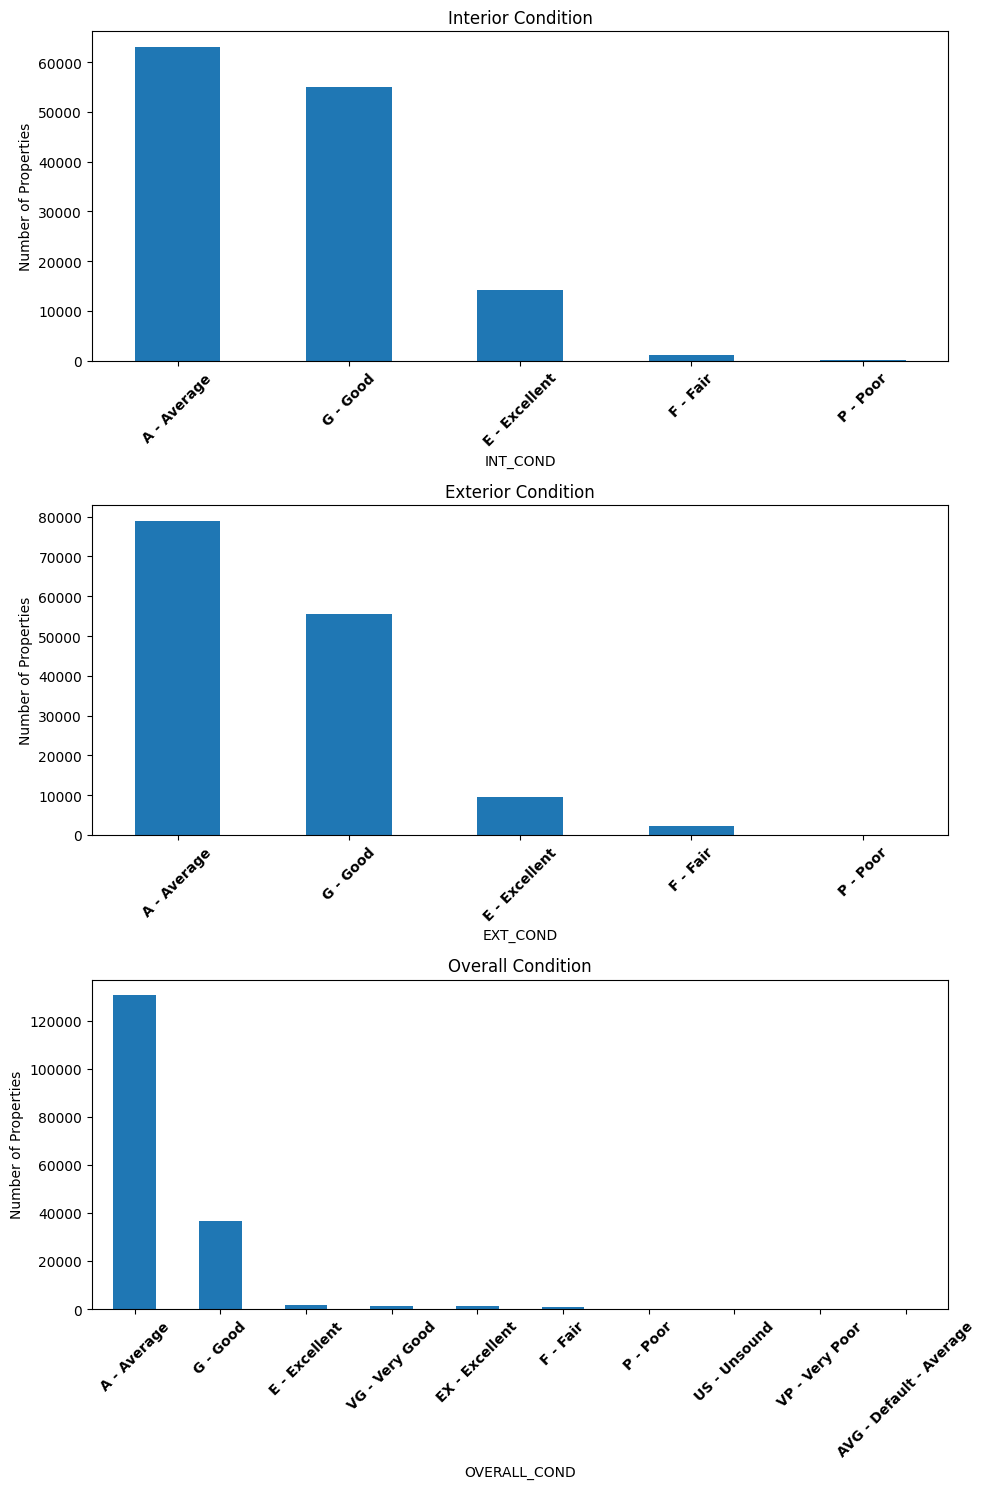

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data_path = 'PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv'  # Change this to the path of your CSV file
data = pd.read_csv(data_path, low_memory=False)

# Create summary tables
int_cond_counts = data['INT_COND'].value_counts()
ext_cond_counts = data['EXT_COND'].value_counts()
overall_cond_counts = data['OVERALL_COND'].value_counts()

# Print summary tables
print(int_cond_counts)
print(ext_cond_counts)
print(overall_cond_counts)

# Plotting bar plots for each condition type
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

int_cond_counts.plot(kind='bar', ax=axes[0], title='Interior Condition')
ext_cond_counts.plot(kind='bar', ax=axes[1], title='Exterior Condition')
overall_cond_counts.plot(kind='bar', ax=axes[2], title='Overall Condition')

# Set common labels
axes[0].set_ylabel('Number of Properties')
axes[1].set_ylabel('Number of Properties')
axes[2].set_ylabel('Number of Properties')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontweight='bold', rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontweight='bold', rotation=45)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontweight='bold', rotation=45)


plt.tight_layout()
# bold x-axis labels

plt.show()


In [7]:
import pandas as pd

# Load your data
data_path = 'PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv'  # Replace with the path of your CSV file
data = pd.read_csv(data_path, low_memory=False)

# Define the condition mapping based on the provided categories
condition_mapping = {
    'A - Average': 3,
    'G - Good': 4,
    'E - Excellent': 5,
    'VG - Very Good': 4.5,
    'EX - Excellent': 5,
    'F - Fair': 2,
    'P - Poor': 1,
    'US - Unsound': 0.5,
    'VP - Very Poor': 0.5,
    'AVG - Default - Average': 3
}

# Update the weights for the conditions
weights_int_extreme = {'INT_COND': 0.9, 'EXT_COND': 0.05, 'OVERALL_COND': 0.05}
weights_ext_extreme = {'INT_COND': 0.05, 'EXT_COND': 0.9, 'OVERALL_COND': 0.05}
weights_overall_extreme = {'INT_COND': 0.05, 'EXT_COND': 0.05, 'OVERALL_COND': 0.9}

# Function to calculate the weighted score for a row
def calculate_weighted_score(row, mapping, weights):
    score = 0
    weight_sum = 0

    # Use OVERALL_COND if INT_COND and EXT_COND are NaN
    if pd.isnull(row['INT_COND']) and pd.isnull(row['EXT_COND']):
        return mapping.get(row['OVERALL_COND'], 0)

    # Calculate the weighted score for conditions that are not NaN
    for cond in ['INT_COND', 'EXT_COND', 'OVERALL_COND']:
        cond_value = row[cond]
        if pd.notnull(cond_value):
            score += mapping.get(cond_value, 0) * weights[cond]
            weight_sum += weights[cond]

    # Normalize the score by the total weight used
    return score / weight_sum if weight_sum else 0

# Ensure the data in condition columns matches the keys in the mapping
for col in ['INT_COND', 'EXT_COND', 'OVERALL_COND']:
    data[col] = data[col].fillna('')  # Fill NaN with empty strings
    data[col] = data[col].apply(lambda x: x.strip() if isinstance(x, str) else x)  # Strip whitespaces
    data[col] = data[col].replace('', pd.NA)  # Replace empty strings back with NaN

# Calculate the weighted score for each property in the DataFrame
data['Score_INT'] = data.apply(lambda row: calculate_weighted_score(row, condition_mapping, weights_int_extreme), axis=1)
data['Score_EXT'] = data.apply(lambda row: calculate_weighted_score(row, condition_mapping, weights_ext_extreme), axis=1)
data['Score_OVERALL'] = data.apply(lambda row: calculate_weighted_score(row, condition_mapping, weights_overall_extreme), axis=1)


# Output the DataFrame with the new Weighted_Score column
output_path = 'PROPERTY_ASSESSMENT_WITH_SCORES.csv'  # Replace with your desired output file path
data.to_csv(output_path, index=False)


In [8]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from folium.map import LayerControl

# Load the data
data_path = 'PROPERTY_ASSESSMENT_WITH_SCORES.csv'
data = pd.read_csv(data_path, low_memory=False)

# Initialize a map centered around the average latitude and longitude
map_center = data[['Latitude', 'Longitude']].mean().values
my_map = folium.Map(location=map_center, zoom_start=12)

geojson_path = 'BPDA_Neighborhood_Boundaries.geojson'  # Change this to the path of your GeoJSON file
folium.GeoJson(geojson_path, name='Boston Neighborhoods').add_to(my_map)

# Function to add a heatmap layer to the map for a given score type
def add_heatmap_layer(data, score_type, layer_name):
    # Filter out rows where the score or coordinates are NaN
    filtered_data = data.dropna(subset=['Latitude', 'Longitude', score_type])
    
    # Prepare data for the heatmap
    heat_data = [(row['Latitude'], row['Longitude'], row[score_type]) for index, row in filtered_data.iterrows()]
    
    # Create and add a HeatMap layer to the map
    heatmap_layer = HeatMap(heat_data, name=layer_name, show=False)  # Set 'show=False' to hide layer by default
    heatmap_layer.add_to(my_map)

# Add heatmap layers for each score type
add_heatmap_layer(data, 'Score_INT', 'Interior Focus Score')
add_heatmap_layer(data, 'Score_EXT', 'Exterior Focus Score')
add_heatmap_layer(data, 'Score_OVERALL', 'Overall Focus Score')

# Add a layer control panel to the map
LayerControl().add_to(my_map)

# Save the map to an HTML file
my_map.save('heatmap_combined.html')


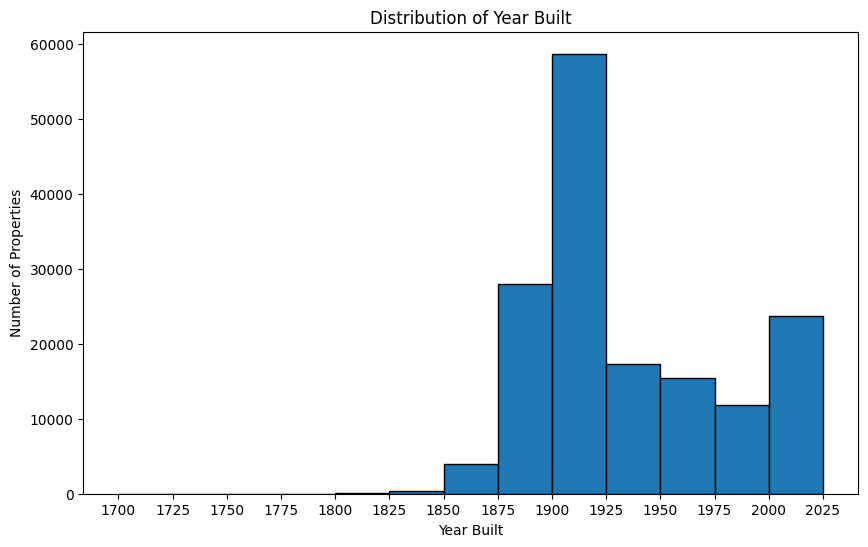

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


# define the function to calculate the distance between two points
bins = np.arange(data['YR_BUILT'].min(), 2026, 25)

# Create the histogram for the 'YR_BUILT' distribution
plt.figure(figsize=(10, 6))
plt.hist(data['YR_BUILT'], bins=bins, edgecolor='black', range=(data['YR_BUILT'].min(), 2023))
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')

plt.xticks(bins)

plt.show()


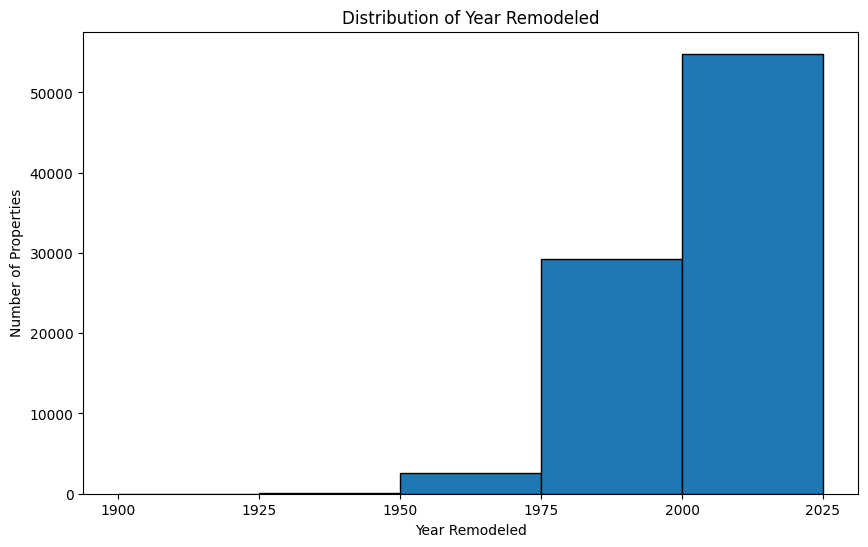

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# remove rows with missing values in 'YR_REMODEL' and < 1900 
data = data.dropna(subset=['YR_REMODEL'])
data = data[data['YR_REMODEL'] >= 1900]

# Define bins to include the range from the earliest remodel year to 2023
bins = np.arange(data['YR_REMODEL'].min(), 2026, 25)

# Create the histogram for the 'YR_REMODEL' distribution
plt.figure(figsize=(10, 6))
plt.hist(data[data['YR_REMODEL'].notnull()]['YR_REMODEL'], bins=bins, edgecolor='black', range=(data['YR_REMODEL'].min(), 2023))
plt.title('Distribution of Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('Number of Properties')

# Set x-axis ticks to include all bin edges
plt.xticks(bins)

plt.show()


In [42]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np

# Load the data
file_path = 'PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv'
data = pd.read_csv(file_path, low_memory=False)

# Drop the rows where year built is invalid (greater than the current year, 2024)
data = data[(data['YR_BUILT'] > 0) & (data['YR_BUILT'] <= 2024)]

# Determine the range of years for the heatmap layers
min_year = data['YR_BUILT'].min()
max_year = data['YR_BUILT'].max()
year_bins = np.arange(min_year, max_year + 1, 25)

# Create a folium map centered around Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

geojson_path = 'BPDA_Neighborhood_Boundaries.geojson'  # Change this to the path of your GeoJSON file
folium.GeoJson(geojson_path, name='Boston Neighborhoods').add_to(boston_map)

# For each 25-year period, create a heatmap layer and add it to the map
for start_year in year_bins:
    end_year = start_year + 24
    period_data = data[(data['YR_BUILT'] >= start_year) & (data['YR_BUILT'] <= end_year)]
    heat_data = [[row['Latitude'], row['Longitude']] for index, row in period_data.iterrows() if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]
    
    # Only add the layer if there is data
    if heat_data:
        heatmap_layer = HeatMap(heat_data)
        boston_map.add_child(folium.FeatureGroup(name=f"{start_year}-{end_year}", show=False).add_child(heatmap_layer))

# Add layer control to toggle layers
folium.LayerControl(collapsed=False).add_to(boston_map)

# Save map to an HTML file
map_file_path = 'boston_year_heatmap.html'
boston_map.save(map_file_path)


In [44]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np

# Load the data
file_path = 'PROPERTY_ASSESSMENT_COORDINATES_FULLY_MERGED.csv'
data = pd.read_csv(file_path, low_memory=False)

# Drop the rows where year built is invalid (greater than the current year, 2024)
data = data[(data['YR_REMODEL'] > 1900) & (data['YR_REMODEL'] <= 2024)]

# Determine the range of years for the heatmap layers
min_year = data['YR_REMODEL'].min()
max_year = data['YR_REMODEL'].max()
year_bins = np.arange(min_year, max_year + 1, 25)

# Create a folium map centered around Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
geojson_path = 'BPDA_Neighborhood_Boundaries.geojson'  # Change this to the path of your GeoJSON file
folium.GeoJson(geojson_path, name='Boston Neighborhoods').add_to(boston_map)

# For each 25-year period, create a heatmap layer and add it to the map
for start_year in year_bins:
    end_year = start_year + 24
    period_data = data[(data['YR_REMODEL'] >= start_year) & (data['YR_REMODEL'] <= end_year)]
    heat_data = [[row['Latitude'], row['Longitude']] for index, row in period_data.iterrows() if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]
    
    # Only add the layer if there is data
    if heat_data:
        heatmap_layer = HeatMap(heat_data)
        boston_map.add_child(folium.FeatureGroup(name=f"{start_year}-{end_year}", show=False).add_child(heatmap_layer))

# Add layer control to toggle layers
folium.LayerControl(collapsed=False).add_to(boston_map)

# Save map to an HTML file
map_file_path = 'boston_year_remodel_heatmap.html'
boston_map.save(map_file_path)


C:\Users\23798\AppData\Local\Temp\ipykernel_8424\3894228073.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('PROPERTY_ASSESSMENT_WITH_SCORES.csv')


Number of remodels after 2000: 52913
Total number of remodels: 86718
Proportion of remodels after 2000: 61.02%


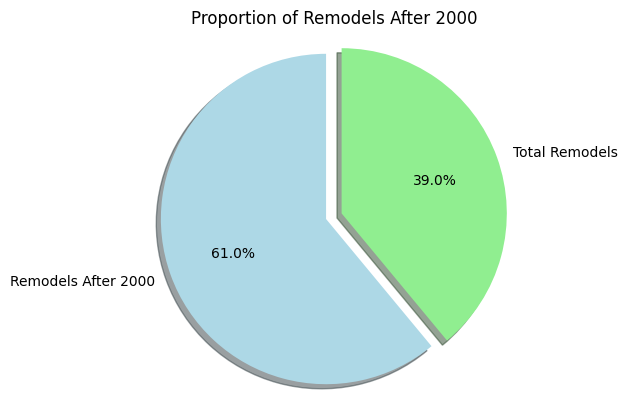

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('PROPERTY_ASSESSMENT_WITH_SCORES.csv', low_memory=False)

# Filter the data for remodels after 2000
remodels_after_2000 = data[data['YR_REMODEL'] > 2000]

# Count the number of remodels after 2000
num_remodels_after_2000 = remodels_after_2000.shape[0]

# Count the total number of remodels
total_remodels = data['YR_REMODEL'].notna().sum()

# Calculate the proportion
proportion_after_2000 = num_remodels_after_2000 / total_remodels

# Print out the results
print(f"Number of remodels after 2000: {num_remodels_after_2000}")
print(f"Total number of remodels: {total_remodels}")
print(f"Proportion of remodels after 2000: {proportion_after_2000:.2%}")

# Pie chart visualization
labels = 'Remodels After 2000', 'Total Remodels'
sizes = [num_remodels_after_2000, total_remodels - num_remodels_after_2000]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Remodels After 2000')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Remodels After 2000')
plt.show()
